In [53]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

seed = 231094

# Regular Expressions and Word Tokenization

## Introduction to Regular Expressions

Regular expressions are strings with special syntax that allow us to find particular patterns in strings. 
- Find links. 
- Parse email addresses.
- Remove unwanted characters. 

In [3]:
# To check a match between two strings.
re.match('abcd', 'abcd')

<re.Match object; span=(0, 4), match='abcd'>

In [4]:
re.match('Dill', 'Dillon')

<re.Match object; span=(0, 4), match='Dill'>

In [5]:
# Match with the first word. 
re.match('\w+', 'First word')

<re.Match object; span=(0, 5), match='First'>

In [6]:
# Match on the firs letter. Note the absence of +.
re.match('\w', 'first letter')

<re.Match object; span=(0, 1), match='f'>

In [7]:
# Match with the first digit.
re.match('\d', '923')

<re.Match object; span=(0, 1), match='9'>

In [8]:
# Match with the first space.
re.match('\s', ' a b c ')

<re.Match object; span=(0, 1), match=' '>

In [9]:
re.match('[a-z]+', 'hello')

<re.Match object; span=(0, 5), match='hello'>

In [10]:
# Search will check the entire string.
re.search('Dillon', 'Hello Dillon')

<re.Match object; span=(6, 12), match='Dillon'>

In [11]:
# To split on the spaces.
re.split('\s', 'Split on the spaces.')

['Split', 'on', 'the', 'spaces.']

## Introduction to Tokenization

Tokenization is transforming a string or document into smaller chunks. 

In [12]:
# Tokenizing on words.
word_tokenize('Hello my name is Dillon!')

['Hello', 'my', 'name', 'is', 'Dillon', '!']

In [13]:
# Tokenizing on sentences.
sent_tokenize('Sometimes to understand a word\'s meaning you need more than a definition; you need to see the word used in a sentence. At YourDictionary, we give you the tools to learn what a word means and how to use it correctly. With this sentence maker, simply type a word in the search bar and see a variety of sentences with that word used in its different ways. Our sentence generator can provide more context and relevance, ensuring you use a word the right way.')

["Sometimes to understand a word's meaning you need more than a definition; you need to see the word used in a sentence.",
 'At YourDictionary, we give you the tools to learn what a word means and how to use it correctly.',
 'With this sentence maker, simply type a word in the search bar and see a variety of sentences with that word used in its different ways.',
 'Our sentence generator can provide more context and relevance, ensuring you use a word the right way.']

In [14]:
# Tokeniizng on unique words.
set(word_tokenize('Here is a sentence with a few common words. Like this one here, and that sentence there.'))

{',',
 '.',
 'Here',
 'Like',
 'a',
 'and',
 'common',
 'few',
 'here',
 'is',
 'one',
 'sentence',
 'that',
 'there',
 'this',
 'with',
 'words'}

## Advanced Tokenization with Regex

Groups can be made using () or ranges using []

In [15]:
match_digits_and_words = ('(\d+|\w+)')
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

In [16]:
re.findall('[a-z]', 'abcd')

['a', 'b', 'c', 'd']

In [17]:
re.findall('(a|b|c)', 'abcd')

['a', 'b', 'c']

In [18]:
re.findall('\-|\.', 'www.my-site.com')

['.', '-', '.']

## Using Matplotlib

(array([2., 0., 1., 0., 0., 0., 3., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

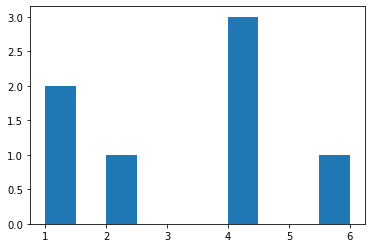

In [19]:
sentence = 'This is a pretty cool tool!'
words = word_tokenize(sentence)

word_lens = [len(s) for s in words]
plt.hist(word_lens)

# Simple Topic Identification

Bag-of-words is a simple method for identifying topics. Need to tokenize a word, then count those words. The more frequent a word the easier it is to indentify the theme. 

In [20]:
sentence = 'The cat is in the box. The cat likes the box. The box is over the cat.'
counter = Counter(word_tokenize(sentence))


In [21]:
counter

Counter({'The': 3,
         'cat': 3,
         'is': 2,
         'in': 1,
         'the': 3,
         'box': 3,
         '.': 3,
         'likes': 1,
         'over': 1})

In [22]:
counter.most_common(2)

[('The', 3), ('cat', 3)]

## Simple Text Preprocessing

In [23]:
text = 'The cat is in the box. The cat likes the box. The box is over the cat.'

tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]


In [24]:
tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [25]:
Counter(tokens).most_common(2)

[('the', 6), ('cat', 3)]

In [26]:
no_stops

['cat', 'box', 'cat', 'likes', 'box', 'box', 'cat']

In [27]:
Counter(no_stops).most_common(2)

[('cat', 3), ('box', 3)]

# Named Entity Recognition

A method to indetify the who, what, where, when and why of text. 

In [28]:
article = '''Albert Einstein was born in Ulm, 
in the Kingdom of Württemberg in the German Empire, 
on 14 March 1879 into a family of secular Ashkenazi Jews.
His parents were Hermann Einstein, a salesman and engineer, and Pauline Koch. 
In 1880, the family moved to Munich, where Einstein's father and his uncle 
Jakob founded Elektrotechnische Fabrik J. Einstein & Cie, a company that 
manufactured electrical equipment based on direct current.'''

In [29]:
sentences = sent_tokenize(article)
token_sentences = [word_tokenize(w) for w in sentences]
pos_sentences = [nltk.pos_tag(w) for w in token_sentences]

In [30]:
pos_sentences

[[('Albert', 'NNP'),
  ('Einstein', 'NNP'),
  ('was', 'VBD'),
  ('born', 'VBN'),
  ('in', 'IN'),
  ('Ulm', 'NNP'),
  (',', ','),
  ('in', 'IN'),
  ('the', 'DT'),
  ('Kingdom', 'NNP'),
  ('of', 'IN'),
  ('Württemberg', 'NNP'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('German', 'JJ'),
  ('Empire', 'NNP'),
  (',', ','),
  ('on', 'IN'),
  ('14', 'CD'),
  ('March', 'NNP'),
  ('1879', 'CD'),
  ('into', 'IN'),
  ('a', 'DT'),
  ('family', 'NN'),
  ('of', 'IN'),
  ('secular', 'JJ'),
  ('Ashkenazi', 'NNP'),
  ('Jews', 'NNP'),
  ('.', '.')],
 [('His', 'PRP$'),
  ('parents', 'NNS'),
  ('were', 'VBD'),
  ('Hermann', 'NNP'),
  ('Einstein', 'NNP'),
  (',', ','),
  ('a', 'DT'),
  ('salesman', 'NN'),
  ('and', 'CC'),
  ('engineer', 'NN'),
  (',', ','),
  ('and', 'CC'),
  ('Pauline', 'NNP'),
  ('Koch', 'NNP'),
  ('.', '.')],
 [('In', 'IN'),
  ('1880', 'CD'),
  (',', ','),
  ('the', 'DT'),
  ('family', 'NN'),
  ('moved', 'VBD'),
  ('to', 'TO'),
  ('Munich', 'NNP'),
  (',', ','),
  ('where', 'WRB'),
  ('Einste

In [31]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = True)
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label') and chunk.label() == 'NE': # Named Entity
            print(chunk)

(NE Albert/NNP Einstein/NNP)
(NE Ulm/NNP)
(NE Württemberg/NNP)
(NE German/JJ Empire/NNP)
(NE Ashkenazi/NNP Jews/NNP)
(NE Hermann/NNP Einstein/NNP)
(NE Pauline/NNP Koch/NNP)
(NE Munich/NNP)
(NE Einstein/NNP)
(NE Jakob/NNP)
(NE Elektrotechnische/NNP Fabrik/NNP J./NNP Einstein/NNP)


# Building a Fake News Classifier

In [64]:
news = pd.read_csv('/Users/Dillon/OneDrive/Documents/DataCampML/fake_or_real_news.csv')

In [65]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [66]:
y = news['label']
X = news['text']

## Using CountVectorizer

In [67]:
count_vec = CountVectorizer(stop_words='english')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [69]:
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)

In [70]:
count_df = pd.DataFrame(count_train.A, columns = count_vec.get_feature_names())
count_df.head()

,00,000,0000,00000031,0002,000billion,000ft,000x,001,002,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
nav_b = MultinomialNB()
nav_b.fit(count_train, y_train)
y_preds = nav_b.predict(count_test)
metrics.accuracy_score(y_test, y_preds)

0.9042609153077328

In [72]:
metrics.confusion_matrix(y_test, y_preds, labels = ['FAKE', 'REAL'])

array([[808, 108],
       [ 74, 911]])

## Using TfidfVectorizer

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [74]:
tfidf_vec = TfidfVectorizer(stop_words='english', max_df = 0.7)

In [75]:
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)

In [76]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vec.get_feature_names())
tfidf_df.head()

,00,000,0000,00000031,0002,000billion,000ft,000x,001,002,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.034606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
nav_b.fit(tfidf_train, y_train)
y_preds = nav_b.predict(tfidf_test)
metrics.accuracy_score(y_test, y_preds)

0.8542872172540767

In [78]:
metrics.confusion_matrix(y_test, y_preds, labels = ['FAKE', 'REAL'])

array([[662, 254],
       [ 23, 962]])